q. 5
https://leetcode.com/problems/stone-game-v/

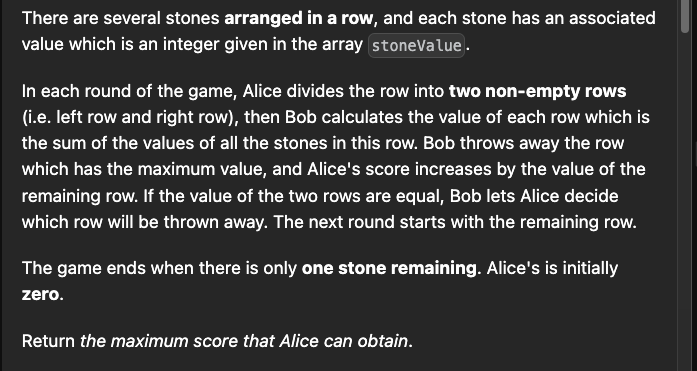

In [ ]:
class Solution {
    public:
            int f(int s, int e, vector<int> &v, vector<vector<int>> &mem){
                if(s==e) return 0;
                if(mem[s][e]!=-1) return mem[s][e];
                int sumOfArr=accumulate(v.begin()+s,v.begin()+e+1,0);
                int lSum=0,rSum=sumOfArr;
                int ans=0;
                for(int i=s;i<e;i++){
                    lSum+=v[i];
                    rSum-=v[i];
                    if(lSum<rSum) ans=max(ans,lSum+f(s,i,v,mem));
                    if(lSum==rSum) ans=max(ans,lSum+max(f(s,i,v,mem),f(i+1,e,v,mem)));
                    if(lSum>rSum) ans=max(ans,rSum+f(i+1,e,v,mem));
                }
                return mem[s][e]=ans;
            }   
    
    
            int stoneGameV(vector<int>& v) {
                int n=v.size();
                vector<vector<int>> mem(n,vector<int>(n,-1));
                return f(0,n-1,v,mem);
            }
    };

In [ ]:
//code in production
class Solution {
    public:
        int stoneGameV(vector<int>& prefixSum){
            int n=prefixSum.size();
            if(n==1)return 0;
            for(int i=1;i<n;i++)prefixSum[i]+=prefixSum[i-1];
    
            vector<vector<int>>dp(n,vector<int>(n,0));
            for(int i=0;i<n;i++) dp[i][i]=0;
            
            for(int len=2;len<=n;len++){
                for(int s=0;s+len-1<n;s++){
                    int e=s+len-1;
                    int ans=0;
                    for(int splitPoint=s;splitPoint<e;splitPoint++){
                            int lSum=prefixSum[splitPoint];
                            if(s-1>=0)lSum-=prefixSum[s-1];
                            int rSum=prefixSum[e];
                            rSum-=prefixSum[splitPoint];
                            if(lSum<rSum){
                                ans=max(ans,lSum+dp[s][splitPoint]);
                            }
                            else if(rSum<lSum){
                                ans=max(ans,rSum+dp[splitPoint+1][e]);
                            }
                            else{
                                ans=max(ans,lSum+max(dp[s][splitPoint],dp[splitPoint+1][e]));
                            }
                    }
                    dp[s][e]=ans;         
                }
            }
            return dp[0][n-1];            
        }
    };

In [ ]:
//depraceated
class Solution {
    public:
        int stoneGameV(vector<int>& prefixSum){
            int n=prefixSum.size();
            if(n==1)return 0;
            for(int i=1;i<n;i++)prefixSum[i]+=prefixSum[i-1];
    
            vector<vector<int>>dp(n,vector<int>(n,0));
            
            for(int len=1;len<=n-1;len++){
                for(int s=0;s+len<n;s++){
                    int e=s+len;
                    int ans=0;
                    for(int splitPoint=s;splitPoint<e;splitPoint++){
                            int lSum=prefixSum[splitPoint];
                            if(s-1>=0)lSum-=prefixSum[s-1];
                            int rSum=prefixSum[e];
                            rSum-=prefixSum[splitPoint];
                            if(lSum<rSum){
                                ans=max(ans,lSum+dp[s][splitPoint]);
                            }
                            else if(rSum<lSum){
                                ans=max(ans,rSum+dp[splitPoint+1][e]);
                            }
                            else{
                                ans=max(ans,lSum+max(dp[s][splitPoint],dp[splitPoint+1][e]));
                            }
                    }
                    dp[s][e]=ans;         
                }
            }
            return dp[0][n-1];            
        }
    };

q. non gfg problems
//first level
//f(0,k)+f(k+1,n-1)+ cost to multyply them
//k varies from 0 to n-2

//f(i,i)==0  

rows[i] * col[k] * col[j]

//m1rows * m2column
//m3row  * m4column 

m1row*m2col*m4col